In [1]:
#Importing all the libraries required to develop our analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing the dataset and check the first 5 rows
marketing = pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')
marketing.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
# Column Unammed will be removed because is unnecesary
marketing.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#Checking if the action was made successfully
marketing.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [5]:
#To improve the column names, we will replace the spaces with underscores ('_')
marketing.rename(columns=lambda x: x.strip().replace (" ", "_"), inplace=True)
marketing.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [6]:
# Checking the number of rows and columns of this dataset
marketing.shape

(588101, 6)

In [7]:
# Getting stastics values from numeric columns
marketing.describe()

,user_id,total_ads,most_ads_hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [8]:
# Checking data type of each column and if there's missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [9]:
#Checking if there's no duplicates
marketing.duplicated().sum()

0

In [10]:
# Number of people by each test group 
rows_by_tg = marketing.groupby(['test_group'])['user_id'].nunique()
print(rows_by_tg)

test_group
ad     564577
psa     23524
Name: user_id, dtype: int64


To remember, the conversion rate represents the percentage of people that we market to who ultimately convert to our product or service. 

Its formula is: Number of people who converted / Total number of people we marketed to

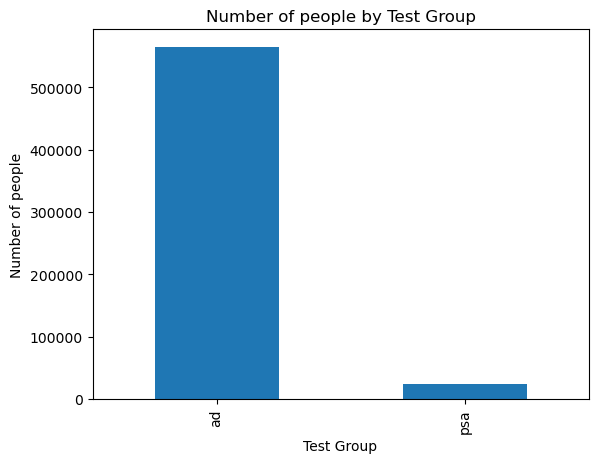

In [11]:
# Plotting number of rows by test group 
rows_by_tg.plot(kind='bar')
plt.title('Number of people by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of people')
plt.show()

In [12]:
# Calculating how many people was converted and who was not 
group_converted = marketing.groupby('converted').count()['user_id']
print(group_converted)

converted
False    573258
True      14843
Name: user_id, dtype: int64


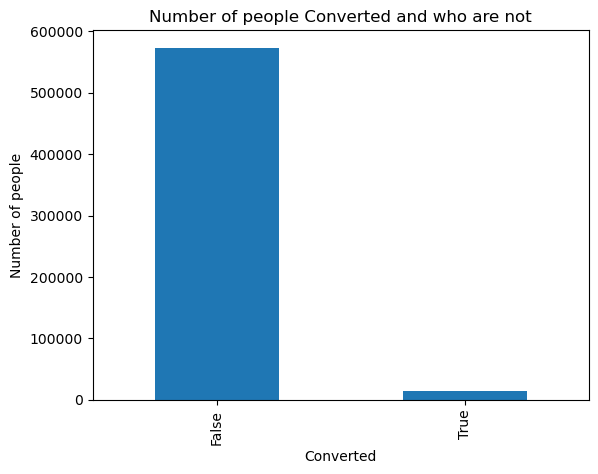

In [13]:
# Plotting counting people converted and who are not
group_converted.plot(kind = 'bar')
plt.title('Number of people Converted and who are not')
plt.xlabel('Converted')
plt.ylabel('Number of people')
plt.show()

In [14]:
# Calculating the conversion rate 
new_subcribers = marketing[marketing['converted']==True]['user_id'].nunique()
total = marketing['user_id'].nunique()


# Conversion rate
conversion_rate = new_subcribers / total
print('Conversion rate is:', round(conversion_rate*100,2),'%')

Conversion rate is: 2.52 %


Previous conversion rate doesn't say if the ads actually worked. So, let's calculate the conversion rate by each test group. 

In [15]:
# Number of people by each test group 
p_test_group = marketing.groupby('test_group')['user_id'].nunique()

# Number of people converted by each test group
new_subscribers_by_tg = marketing[marketing['converted']==True].groupby(['test_group'])['user_id'].nunique()

# Convertion rate by test group 
convertion_rate_by_tg = new_subscribers_by_tg / p_test_group 
print(round(convertion_rate_by_tg * 100, 2),'%')

test_group
ad     2.55
psa    1.79
Name: user_id, dtype: float64 %


In [16]:
# Most ads saw per day 
ads_day = marketing.groupby(['most_ads_day'])['user_id'].nunique()
print(ads_day)

most_ads_day
Friday       92608
Monday       87073
Saturday     81660
Sunday       85391
Thursday     82982
Tuesday      77479
Wednesday    80908
Name: user_id, dtype: int64


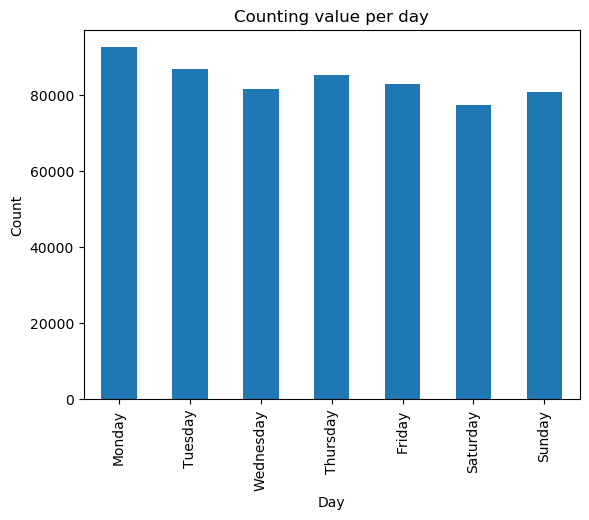

<Figure size 8x6 with 0 Axes>

In [17]:
# Plotting number of views by day 
ads_day.plot(kind='bar')
plt.title('Counting value per day')
plt.style.use('_classic_test_patch')
x = [0,1,2,3,4,5,6]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(x,day_order)
plt.xlabel('Day')
plt.ylabel('Count')
plt.figure(figsize=(.08,.06))
plt.show()

In [18]:
# Calculating the ads viewed per hour 
ads_per_hour = marketing.groupby(['most_ads_hour'])['user_id'].nunique()
print(ads_per_hour)

most_ads_hour
0      5536
1      4802
2      5333
3      2679
4       722
5       765
6      2068
7      6405
8     17627
9     31004
10    38939
11    46210
12    47298
13    47655
14    45648
15    44683
16    37567
17    34988
18    32323
19    30352
20    28923
21    29976
22    26432
23    20166
Name: user_id, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


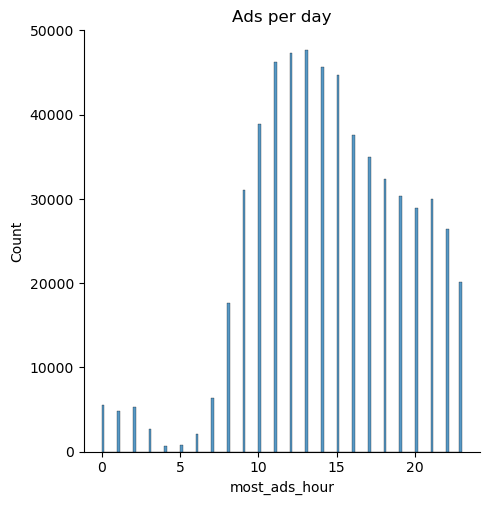

In [19]:
# Plotting the ads views per hour 
sns.displot(data = marketing, x='most_ads_hour')
plt.title('Ads per day')
plt.show()

In [20]:
#Conversion rate by day 
conversion_rate_day = pd.DataFrame(marketing.groupby('most_ads_day')['converted'].mean())
conversion_rate_day.reset_index(inplace = True)
conversion_rate_day

,most_ads_day,converted
0,Friday,0.022212
1,Monday,0.032812
2,Saturday,0.021051
3,Sunday,0.024476
4,Thursday,0.021571
5,Tuesday,0.029840
6,Wednesday,0.024942


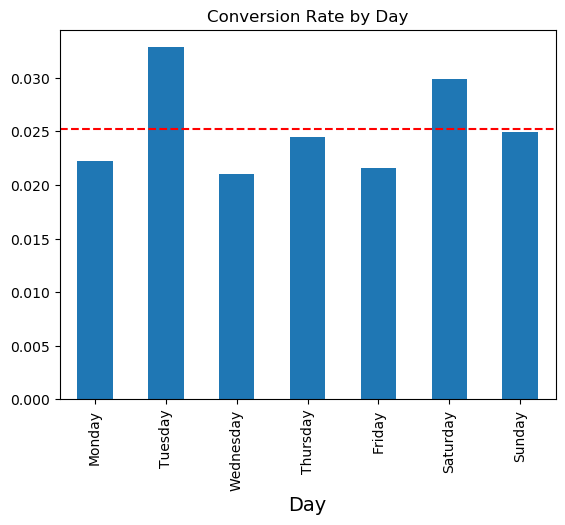

In [21]:
# Plotting conversion rate by day
conversion_rate_day.plot(kind='bar')
x = [0,1,2,3,4,5,6]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(x,day_order)
plt.style.use('_classic_test_patch')
plt.title('Conversion Rate by Day')
plt.legend().set_visible(False)
plt.xlabel('Day', size=14)
plt.axhline(marketing['converted'].mean(), color = 'r', linestyle = '--', label='average')
plt.show()

In [22]:
# Calculating t-statistics and p-value
ttest = ttest_ind(marketing[marketing['test_group'] == 'ad']['converted'], marketing[marketing['test_group'] == 'psa']['converted'])
ttest

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)